<h2> Exercises 10 - geometry operators and transformations </h2>

<h3> Geometry operators </h3>

Spatial analysis tools are directly acessible in QGIS as methods. These are:

Returning information:

    area - returns the area of the object
    length - return the length of the object
    centroid - returns the point in the centre of the object
    
Returning geometry:

    buffer - creates buffer
    combine - creates the sum of the objects
    intersection - returns the interesction of the object
    
Returning True of False:

    compare - compares geometry
    contains - chceks if object contains another object (whole)
    crosses - chechks if two objects corsses (intersect)
    equal - returns True if two objects are identical
    disjoint - checks if object do NOT cross
    distance - checks if two objects are within certain distance to each other
    intersects - checks if object intersect
    overlaps - checks if objects overlap
    touches - check if objects touch (have common points on the outer boundary)
    within - checks if object is contained in another objects (whole)

Let's begin with operators returning data from one object. We are using building layer Budynki_JG from previous exercieses. We have used them before:

In [ ]:
print(geom.area())
print(geom.length()) #for polygons return the length of outer boundary
print(geom.centroid())

    1.2225330000197065e-07 - area of the buliding in degrees squared
    0.0018113738023408103 - lenght in degrees
    <QgsGeometry: Point (15.74956188262261669 50.90287886603740475)> - the centroid in the WGS84 system

Let's now create buffers for the first 50 building using the buffer method.

In [ ]:
layer = iface.activeLayer() #current layer
features = [feature for feature in layer.getFeatures()][:50] #50 features
new = [] #list with new features
for x in features: #features iteration
    new_geom = x.geometry().buffer(0.0004,-1) #we create a buffer from geometry of a size of 0.0004 degrees, - 1 is the number of segments in the buffer (here unlimited)
    new.append(new_geom) #we add geometry to the new list
    
mem_layer = QgsVectorLayer("Polygon","Buffer","memory") #we create a memory layer
pr = mem_layer.dataProvider() #through dataProvider
for n in range(len(nowe)): 
    buffer = QgsFeature(n) #we create a new empty object of id equal to n (n is the iterator of the loop)
    buffer.setGeometry(new[n]) #we take the geometries from the list
    pr.addFeatures([buffer]) #and add features to memory layer
QgsProject.instance().addMapLayer(mem_layer) #and we add memory layer to the canvas

Result:

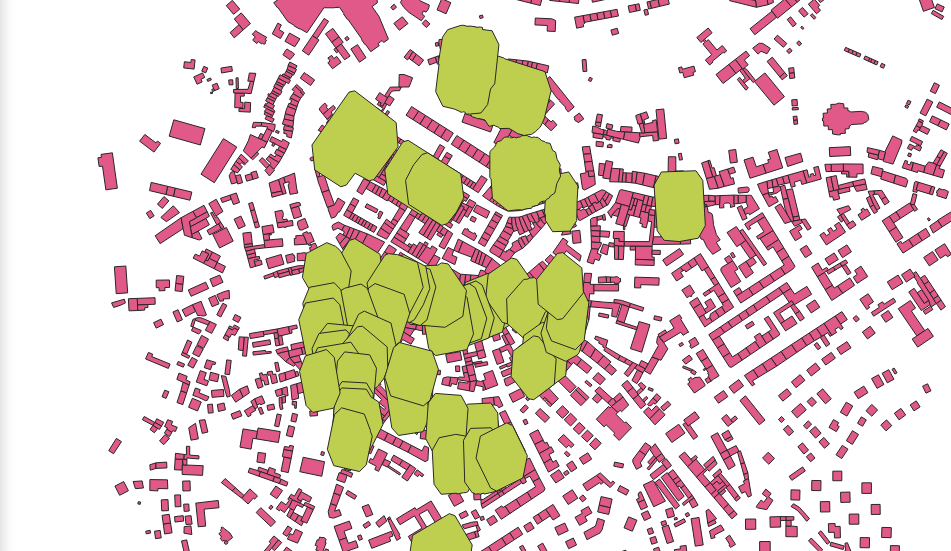

In [12]:
Image('5.png')

Let's now see intersection in action. It requires passing two geometries, which will be intersected. Let's use our newly created buffers, which indoubtly are intersecting.

In the below example we intersect only objects having neighbouring indexes, for examples object of index 1 will be intersected with object of index 2, object of index 2 with object of index 3, and so on. To intersect all of them it would be necessary to create a list of all posible indicies combinations.

In [ ]:
warstwa = iface.activeLayer() #current layer - buffer layer
features = [featre for featre in warstwa.getFeatures()][:50]
new = []
for x in range(len(features)-1): #by list indecies minus 1, because x+1 would cause indexing out of list boudaries
    new_geom = features[x].geometry().intersection(features[x+1].geometry()) #intersection of x with x+1
    new.append(new_geom)
    

mem_layer = QgsVectorLayer("Polygon","Buffer_Intersection","memory") #memory layer and continues as above
pr = mem_layer.dataProvider()
for n in range(len(new)):
    buffer = QgsFeature(n)
    buffer.setGeometry(new[n])
    pr.addFeatures([buffer])
QgsProject.instance().addMapLayer(mem_layer)

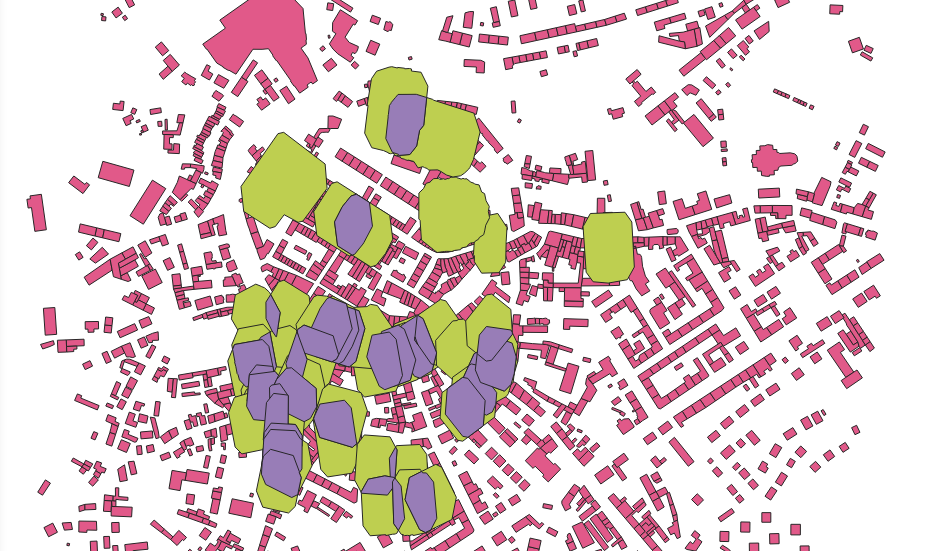

In [13]:
Image('6.png')

Third grouop of method are boolean operators returning True or False. They are checking conditions, let's see if any of buildings is intersecting another building on the layer (there souldn't be).

In [ ]:
import numpy as np #we will use numpy library after

warstwa = iface.activeLayer() #we use Budynki_JG layer
features = [obiekt for obiekt in warstwa.getFeatures()][:50]
intersections = []
for x in range(len(features)): #index 1
    for y in range(len(features)): #index 2
        if x != y: #so x would not be equal to y, it this case it would be the same object
            if_true = features[x].geometry().intersects(features[y].geometry()) #and we check condition
            intersections.append(if_true) #append result to list

print(np.array(intersections).any()) #check if ANY of them is true

The result is true.

<h2> All the results were in degrees. How to convert measures? </h2>

All the time, the data we use, is in the WGS84 refrence system, which is based on degree measure. How to get results, like area, in metres? There are three ways to do it:

1. Convert all the layers to metric reference system,
2. Convert the layer temporaly in the project,
3. Use QgsDistanceArea class

Let's start from no 3:

In [ ]:
layer = iface.activeLayer()
features = [featre.geometry() for feature in warstwa.getFeatures()][:50]

d = QgsDistanceArea() #new class - it allows to measure distance or area in any measure
d.setEllipsoid('WGS84') #we always select WGS84 ellipsoid

for x in features:
    print(d.measureArea(x)) #measure area of X, defult is in metres

We can measure area using different units:

In [ ]:
layer = iface.activeLayer()
features = [featre.geometry() for feature in warstwa.getFeatures()][:50]

d = QgsDistanceArea() #new class - it allows to measure distance or area in any measure
d.setEllipsoid('WGS84') #we always select WGS84 ellipsoid
d.areaUnits()

for x in features:
    measurement = d.measureArea(x)
    acres = d.convertAreaMeasurement(measurement, QgsUnitTypes.AreaUnit(6)) #here in acres 6 == acres
    print(acres)

Reference for units:

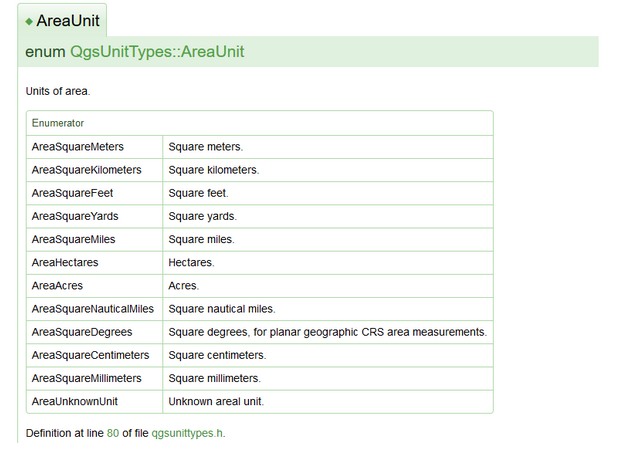

In [14]:
Image('7.png')

For lengths the method is measureLength()

<h4> Nr 2 - Transformations </h4>

New class:     

    QgsCoordinateReferenceSystem

Defining CRS (coordinate reference system):

In [ ]:
crs = QgsCoordinateReferenceSystem(4326, QgsCoordinateReferenceSysten.PostgisCrsId)
#using ID

In [ ]:
wgs = QgsCoordinateReferenceSystem(4326,QgsCoordinateReferenceSystem.EpsgCrsId)
#or PSG

Current layer id is (EPSG):

In [ ]:
layer.crs()

<QgsCoordinateReferenceSystem: EPSG:4326>

From layer we can obtain these attributes:

    uklad.srsid() - EPSG

    uklad.postgisSrid() - CRS ID

    uklad.description()
   
    uklad.mapUnits() - unit according to table:(https://qgis.org/api/classQgsUnitTypes.html#a0602e8a06afd37c267e9e532bb27f50d  - tutaj 6 = kątowa)

Transformation process:

In [ ]:
from_crs = QgsCoordinateReferenceSystem(4326) #pass EPSG
to_crs = QgsCoordinateReferenceSystem(2177) #2000 CRS (Polish CRS)

transformation = QgsCoordinateTransform(from_crs,to_crs, QgsProject.instance()) 
#prepare transformatiosn

layer = iface.activeLayer()
features = [obiekt.geometry() for obiekt in warstwa.getFeatures()][:50] #frist 50 features (geometries)
for x in features:
    x.transform(transformacja) #transform geometry
    #now you should save it somewhere
    

Geometries should be written somwhere - for example to memory  layer:

In [ ]:
from_crs = QgsCoordinateReferenceSystem(4326) #pass EPSG
to_crs = QgsCoordinateReferenceSystem(2177) #2000 CRS (Polish CRS)

transformation = QgsCoordinateTransform(from_crs,to_crs, QgsProject.instance()) 
#prepare transformatiosn

layer = iface.activeLayer()

new_layer = QgsVectorLayer("Polygon","new","memory")
new_layer.setCrs(to_crs) #new layer crs (just metadata is set here)

features = [obiekt for obiekt in warstwa.getFeatures()][:50] #new it is the list of objects, not geometries!

for x in features:
    geometry = x.geometry()
    geometry.transform(transformation)
    x.setGeometry(geometria) #overwrite feature's geometry
    
    new_layer.dataProvider().addFeatures([x]) #add all features to layer - we can do it because we have copied the whole features
    
QgsProject.instance().addMapLayer(new_layer)

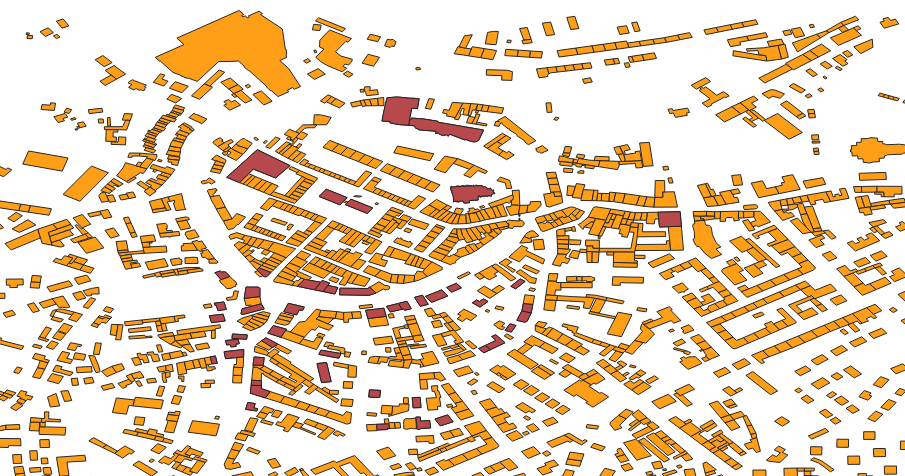

In [15]:
Image('8.png')

Transformed objects are highlited with brown colour. Of course, because the project is in-flight transformed - new objects are in the same place.

And therefore today's lesson concludes our classes on Programming in GIS! Thank you for the attention!

The last list of exercises is attached to this lesson and contains the last three tasks.